In [2]:
## import package

import pandas as pd
import re


In [18]:
df = pd.read_csv('../data/전통시장선택_군집화용.csv', encoding = 'cp949')

## select columns
df = df[['구별인덱스', '지역구', '시장명', '소재지', '주 판매상품', '개설년도', '운영중인 점포(계 - 빈점포)',
       '용도지역', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수']]

## checking columns
df.columns

Index(['구별인덱스', '지역구', '시장명', '소재지', '주 판매상품', '개설년도', '운영중인 점포(계 - 빈점포)',
       '용도지역', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수'],
      dtype='object')

In [19]:
## 이상한 결측치 행들이 있어서 제거
df = df.dropna()

## 인덱스 초기화
df.reset_index(drop = True)

,구별인덱스,지역구,시장명,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),용도지역,매장면적(㎡),종사자 수(명),주차 면수
0,1,중구,자갈치시장,자갈치해안로 52,수산물,1970,272,일반상업,"3,576","1,500",161
1,2,중구,부산데파트상가,부산시 중구 중앙대로21,"건강식품,잡화",1973,90,일반상업,"5,759",116,0
2,3,중구,영주시장,대영로242번길 3,잡화,1973,22,일반상업,"1,100",42,0
3,4,중구,국제시장,중구로 42,"의류,가구,문구",1948,482,일반상업,"9,497",871,29
4,5,중구,창선상가,국제시장2길 5,전기,1948,144,일반상업,"3,892",442,0
...,...,...,...,...,...,...,...,...,...,...,...
59,27,부산진구,동평새시장,당감동 282-68,"청과물,의류",2012,59,준주거,"5,153",62,0
60,28,부산진구,연지시장,연지동 179-5,청과물,2012,83,준주거,"4,799",83,0
61,29,부산진구,양정전통시장,양정동 389-9,청과물,2013,96,준주거,"6,291",96,0
62,30,부산진구,부전기장골목시장,부전동 341-70,"수산물,농산물",2014,84,일반\n상업,"3,054",84,0


In [20]:
## 구 원핫 인코딩
# 중구 (1, 0, 0)
# 동구 (0, 1, 0)
# 부산진구 (0, 0, 1)
df = pd.get_dummies(data = df, columns = ['지역구'], prefix = '지역구')

## 데이터 타입 변경 : float -> int
df['구별인덱스'] = df['구별인덱스'].astype(int)
df['개설년도'] = df['개설년도'].astype(int)
df['주차 면수'] = df['주차 면수'].astype(int)

## checking data
df

,구별인덱스,시장명,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),용도지역,매장면적(㎡),종사자 수(명),주차 면수,지역구_동구,지역구_부산진구,지역구_중구
0,1,자갈치시장,자갈치해안로 52,수산물,1970,272,일반상업,"3,576","1,500",161,0,0,1
1,2,부산데파트상가,부산시 중구 중앙대로21,"건강식품,잡화",1973,90,일반상업,"5,759",116,0,0,0,1
2,3,영주시장,대영로242번길 3,잡화,1973,22,일반상업,"1,100",42,0,0,0,1
3,4,국제시장,중구로 42,"의류,가구,문구",1948,482,일반상업,"9,497",871,29,0,0,1
4,5,창선상가,국제시장2길 5,전기,1948,144,일반상업,"3,892",442,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,27,동평새시장,당감동 282-68,"청과물,의류",2012,59,준주거,"5,153",62,0,0,1,0
60,28,연지시장,연지동 179-5,청과물,2012,83,준주거,"4,799",83,0,0,1,0
61,29,양정전통시장,양정동 389-9,청과물,2013,96,준주거,"6,291",96,0,0,1,0
62,30,부전기장골목시장,부전동 341-70,"수산물,농산물",2014,84,일반\n상업,"3,054",84,0,0,1,0


In [21]:
## 용도지역에 escape code있을 경우에 제거
for i, d in enumerate(df['용도지역']):
    new_str = re.sub("\n", "", d)
    df.iloc[i, 6] = new_str


In [22]:
## 주 판매상품 ,와 공백으로 split -> list로 담기

import pandas as pd


def split_col(data,
              columnname: str):
    length = len(data) ## 데이터 길이 생성 -> 반복문 사용
    for i in range(0, length, 1): ## 반복문
        try: ## 먼저 제거할 것
            data[columnname][i] = data[columnname][i].split(",")
            data[columnname][i] = data[columnname][i].split(" ")
        except: ## 제거 안할 것
            pass

## 함수 실행
split_col(df, "주 판매상품")

## checking  data
df

C:\Users\User\AppData\Local\Temp\ipykernel_15324\1712472306.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columnname][i] = data[columnname][i].split(",")


,구별인덱스,시장명,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),용도지역,매장면적(㎡),종사자 수(명),주차 면수,지역구_동구,지역구_부산진구,지역구_중구
0,1,자갈치시장,자갈치해안로 52,[수산물],1970,272,일반상업,"3,576","1,500",161,0,0,1
1,2,부산데파트상가,부산시 중구 중앙대로21,"[건강식품, 잡화]",1973,90,일반상업,"5,759",116,0,0,0,1
2,3,영주시장,대영로242번길 3,[잡화],1973,22,일반상업,"1,100",42,0,0,0,1
3,4,국제시장,중구로 42,"[의류, 가구, 문구]",1948,482,일반상업,"9,497",871,29,0,0,1
4,5,창선상가,국제시장2길 5,[전기],1948,144,일반상업,"3,892",442,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,27,동평새시장,당감동 282-68,"[청과물, 의류]",2012,59,준주거,"5,153",62,0,0,1,0
60,28,연지시장,연지동 179-5,[청과물],2012,83,준주거,"4,799",83,0,0,1,0
61,29,양정전통시장,양정동 389-9,[청과물],2013,96,준주거,"6,291",96,0,0,1,0
62,30,부전기장골목시장,부전동 341-70,"[수산물, 농산물]",2014,84,일반상업,"3,054",84,0,0,1,0


In [23]:
## data에서 숫자에 ,가 들어있는 부분이 문자열임을 확인, 먼저 , 부터 제거하도록 하자

for i, d in enumerate(df['운영중인 점포(계 - 빈점포)']):
    new_str = re.sub(",", "", d)
    df.iloc[i, 5] = new_str


for i, d in enumerate(df[' 매장면적(㎡) ']):
    new_str = re.sub(",", "", d)
    df.iloc[i, 7] = new_str

for i, d in enumerate(df['종사자 수(명)']):
    new_str = re.sub(",", "", d)
    df.iloc[i, 8] = new_str

In [24]:
df

,구별인덱스,시장명,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),용도지역,매장면적(㎡),종사자 수(명),주차 면수,지역구_동구,지역구_부산진구,지역구_중구
0,1,자갈치시장,자갈치해안로 52,[수산물],1970,272,일반상업,3576,1500,161,0,0,1
1,2,부산데파트상가,부산시 중구 중앙대로21,"[건강식품, 잡화]",1973,90,일반상업,5759,116,0,0,0,1
2,3,영주시장,대영로242번길 3,[잡화],1973,22,일반상업,1100,42,0,0,0,1
3,4,국제시장,중구로 42,"[의류, 가구, 문구]",1948,482,일반상업,9497,871,29,0,0,1
4,5,창선상가,국제시장2길 5,[전기],1948,144,일반상업,3892,442,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,27,동평새시장,당감동 282-68,"[청과물, 의류]",2012,59,준주거,5153,62,0,0,1,0
60,28,연지시장,연지동 179-5,[청과물],2012,83,준주거,4799,83,0,0,1,0
61,29,양정전통시장,양정동 389-9,[청과물],2013,96,준주거,6291,96,0,0,1,0
62,30,부전기장골목시장,부전동 341-70,"[수산물, 농산물]",2014,84,일반상업,3054,84,0,0,1,0


In [25]:
### pca 진행

##pca 진행 이전에 scaling 부터 진행
"""
StandardScaler() ** -> 사용할 예정
    특성들의 평균을 0, 분산을 1 로 스케일링하는 것입니다.
    즉, 특성들을 정규분포로 만드는 것입니다.
    최솟값과 최댓값의 크기를 제한하지 않기 때문에, 어떤 알고리즘에서는 문제가 있을 수 있으며
    이상치에 매우 민감합니다.
    회귀보다 분류에 유용합니다.**
MinMaxScaler()
    Min-Max Normalization 이라고도 불리며,
    특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것입니다.
    가작 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게됩니다.
    이상치에 매우 민감합니다.
    분류보다 회귀에 유용합니다.
MaxAbsScaler()
    각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
    즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
    이상치에 매우 민감합니다.
RobustScaler() ** -> 2번째 후보
    평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
    중간 값은 정렬시 중간에 있는 값을 의미하고
    사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
    이상치 영향을 최소화할 수 있습니다.
Normalizer()
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
    그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
    이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
    일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
    모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
    특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.
    
"""

# 먼저 category 형인 데이터는 category로 지정해줄 예정 
# -> 지역구_동구, 지역구_부산진구, 지역구_중구, 시장명, 소재지, 주 판매상품

list_category = ["지역구_동구", "지역구_부산진구", "지역구_중구", "시장명", "소재지"]

for col in list_category:
    df = df.astype({col:'category'})

    
# 수치형으로 변경할 데이터 설정
# -> 운영중인 점포(계 - 빈점포), 매장면적(㎡), 종사자 수(명), 주차 면수

list_integer = ["운영중인 점포(계 - 빈점포)", " 매장면적(㎡) ", "종사자 수(명)", "주차 면수"]
for col in list_integer:
    length = len(df)
    try:
        df = df.astype({col:'int'})
    except:
        df = df.astype({col:'float'})
        
        


In [26]:
## dataframe 먼저 하나 저장
df.to_csv("../data/clustering_data_modify.csv", encoding = "cp949")

## 주 판매 상품처리

In [13]:
#df_clust = pd.read_excel('../data/클러스터링 직전 전처리_na처리필요.xlsx')
df_clust = pd.read_csv('D:/Users/ChaeSoYeon/Desktop/부산공모전 준비/클러스터링 직전 전처리_ver5.csv')

### 용도지역 label encoding
from sklearn.preprocessing import LabelEncoder

item_label = df_clust["용도지역"]
# encoding_label = ['일반상업', '일반상업지역', '일반주거', '제2종일반주거', '제3종일반주거', '주거', '준주거']
encoder = LabelEncoder() #labelencoder함수를 가져온다.
encoder.fit(item_label) #내가 가지고 있는 데이터에 학습시킨다

digit_label = encoder.transform(item_label) # transform으로 변환한다

## label encoding 진행 -> 용도지역 label encoding 진행
df_clust["용도지역_labeling"] = digit_label

### 원핫 인코딩 -> 용도지역 원핫 인코딩 진행
df_clust=pd.get_dummies(df_clust,columns=['용도지역']) 

In [14]:
df_clust.columns


Index(['Unnamed: 0', '구별인덱스', '시장명', '유동인구', '소재지', '주 판매상품', '개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_labeling', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거'],
      dtype='object')

In [16]:
df_clust['용도지역_종합일반주거'] = df_clust['용도지역_일반주거'] + df_clust['용도지역_제2종일반주거']+df_clust['용도지역_제3종일반주거']

In [17]:
df_clust = df_clust.drop(['용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거'], axis = 1)
df_clust

,Unnamed: 0,구별인덱스,시장명,유동인구,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),매장면적(㎡),종사자 수(명),...,주 판매상품_기타,주 판매상품_꽃,주 판매상품_축산물,주 판매상품_귀금속,용도지역_labeling,용도지역_일반상업,용도지역_일반상업지역,용도지역_주거,용도지역_준주거,용도지역_종합일반주거
0,0,1,자갈치시장,435.166667,자갈치해안로 52,['수산물'],1970,272,3576.00,1500,...,0,0,0,0,0,1,0,0,0,0
1,1,2,부산데파트상가,1876.750000,부산시 중구 중앙대로21,"['건강식품', '잡화']",1973,90,5759.00,116,...,0,0,0,0,0,1,0,0,0,0
2,3,4,국제시장,2558.333333,중구로 42,"['의류', '가구', '문구']",1948,482,9497.00,871,...,0,0,0,0,0,1,0,0,0,0
3,4,5,창선상가,659.583333,국제시장2길 5,['전기'],1948,144,3892.00,442,...,0,0,0,0,0,1,0,0,0,0
4,5,6,보수종합시장,231.416667,보수대로 94,"['청과물', '문구']",1978,117,4725.00,138,...,0,0,0,0,0,1,0,0,0,0
5,6,7,신천지시장,416.166667,자갈치로 33,"['의류', '생활용품']",1980,147,11527.00,200,...,0,0,0,0,0,1,0,0,0,0
6,7,8,신동아수산물\n종합시장,714.250000,부산시 중구 \n자갈치로 42,['수산물'],1987,385,7652.28,258,...,0,0,0,0,1,0,1,0,0,0
7,8,9,남포지하도상가,912.583333,구덕로 지하 44,"['의류', '잡화']",1988,281,6132.00,400,...,0,0,0,0,0,1,0,0,0,0
8,10,11,월드밸리,2702.316000,대청로 60,['잡화'],1995,215,9584.00,145,...,0,0,0,0,0,1,0,0,0,0
9,11,12,남포동 건어물 도매시장,2698.400000,구덕로 19-1(남포동4가),['수산물'],1934,117,7626.00,370,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df_clust.columns

## knn imputation 진행 -> 유동인구 na 값 제거
data_y = df_clust["유동인구"]
data_x = df_clust[['개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_종합일반주거', '용도지역_주거',
       '용도지역_준주거']]




## 클러스터링





In [20]:
### 필요한 인덱스만 가져오기
df_clust.columns

### 원하는 인덱스로 이루어진 final 데이터 프레임 제작
df_final = df_clust[['개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_종합일반주거', '용도지역_주거',
       '용도지역_준주거']]

#### Scaling 진행

In [106]:
### scaling
### pca 진행
##pca 진행 이전에 scaling 부터 진행
"""
StandardScaler() ** -> 사용할 예정
    특성들의 평균을 0, 분산을 1 로 스케일링하는 것입니다.
    즉, 특성들을 정규분포로 만드는 것입니다.
    최솟값과 최댓값의 크기를 제한하지 않기 때문에, 어떤 알고리즘에서는 문제가 있을 수 있으며
    이상치에 매우 민감합니다.
    회귀보다 분류에 유용합니다.**
MinMaxScaler()
    Min-Max Normalization 이라고도 불리며,
    특성들을 특정 범위(주로 [0,1]) 로 스케일링 하는 것입니다.
    가작 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게됩니다.
    이상치에 매우 민감합니다.
    분류보다 회귀에 유용합니다.
MaxAbsScaler()
    각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
    즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
    이상치에 매우 민감합니다.
RobustScaler() ** -> 2번째 후보
    평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
    중간 값은 정렬시 중간에 있는 값을 의미하고
    사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
    이상치 영향을 최소화할 수 있습니다.
Normalizer()
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
    그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
    이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
    일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
    모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
    특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.
    
"""
# ------------------------------------------------------------------------

### Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 위와 동일하지만 더 효율적입니다(fit_transform)
X_scaled_Standardscaler = scaler.fit_transform(df_final[['개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수']])

### 데이터 프레임 넣기
df_StandardScaler = pd.DataFrame(X_scaled_Standardscaler)
df_StandardScaler.columns = ['개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수']

### 데이터 프레임 붙이기
df_StandardScaler = pd.concat([df_StandardScaler,df_final[[ '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거']]],axis=1)


### RobustScaler 진행 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# 위와 동일하지만 더 효율적입니다(fit_transform)
X_scaled_RobustScaler = scaler.fit_transform(df_final)

### 데이터 프레임 넣기
df_RobustScaler = pd.DataFrame(X_scaled_RobustScaler)
df_RobustScaler.columns = ['개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거']

# ------------------------------------------------------------------------


# ## import package
# from sklearn.impute import KNNImputer

# ### knn imputation으로 유동인구 na 값 제거 -> 함수 제작 : df_StandardScaler


# def knn_imputation(data_y, data_x):
#     ## y 변수에 유동인구를 두고, x 변수에 scaling이 진행된 x 데이터를 넣는다.
#     data_y = data_y
#     data_x = data_x

#     data_target =  pd.concat([data_y, data_x])

#     ## KNN imputation 진행
#     # n_neighbors=5(디폴트 값)
#     imputer = KNNImputer(n_neighbors=3)
#     data_imputation = imputer.fit_transform(data_target)
#     data_imputation = pd.DataFrame(data_imputation)
#     data_imputation.columns = ["유동인구",'개설년도',
#        '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
#        '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
#        '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
#        '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
#        '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
#        '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
#        '용도지역_준주거']
    
#     return data_imputation



# ## data imputation 진행: : df_StandardScaler
# data_y = df_clust["유동인구"]
# data_x = df_StandardScaler
# df_StandardScaler = knn_imputation(data_y, data_x)

# ## data imputation 진행: : df_RobustScaler
# data_y = df_clust["유동인구"]
# data_x = df_RobustScaler
# df_RobustScaler = knn_imputation(data_y, data_x)
# ------------------------------------------------------------------------

## robustscaler, standardscaler 모두에 적용
### 카테고리 형 데이터는 카테고리 형으로 타입 변경

list_category=[ '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거']

for col in list_category:
    df_RobustScaler = df_RobustScaler.astype({col: "category"})
    df_StandardScaler = df_StandardScaler.astype({col:"category"})

In [107]:
df_StandardScaler

,개설년도,운영중인 점포(계 - 빈점포),매장면적(㎡),종사자 수(명),주차 면수,지역구_동구,지역구_부산진구,지역구_중구,주 판매상품_수산물,주 판매상품_건강식품,...,주 판매상품_꽃,주 판매상품_축산물,주 판매상품_귀금속,용도지역_일반상업,용도지역_일반상업지역,용도지역_일반주거,용도지역_제2종일반주거,용도지역_제3종일반주거,용도지역_주거,용도지역_준주거
0,-0.312342,0.240638,-0.408173,3.555831,2.063322,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.161299,-0.449265,-0.207903,-0.527018,-0.555440,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-1.419989,1.036679,0.135023,1.700259,-0.083738,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.419989,-0.244569,-0.379183,0.434693,-0.555440,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.090439,-0.346917,-0.302763,-0.462118,-0.392784,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0.191134,-0.233197,0.321257,-0.279215,1.396432,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.543568,0.668984,-0.034213,-0.108113,1.559088,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7,0.593915,0.274754,-0.173684,0.310792,-0.555440,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0.946349,0.024569,0.143005,-0.441467,1.201245,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,-2.124856,-0.346917,-0.036624,0.222291,-0.425315,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
## import package
from sklearn.impute import KNNImputer

### knn imputation으로 유동인구 na 값 제거 -> 함수 제작 : df_StandardScaler


def knn_imputation(data_y, data_x):
    ## y 변수에 유동인구를 두고, x 변수에 scaling이 진행된 x 데이터를 넣는다.
    data_y = data_y
    data_x = data_x

    data_target =  pd.concat([data_y, data_x],axis=1)

    ## KNN imputation 진행
    # n_neighbors=5(디폴트 값)
    imputer = KNNImputer(n_neighbors=3)
    data_imputation = imputer.fit_transform(data_target)
    data_imputation = pd.DataFrame(data_imputation)
    data_imputation.columns = ["유동인구",'개설년도',
       '운영중인 점포(계 - 빈점포)', ' 매장면적(㎡) ', '종사자 수(명)', '주차 면수', '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거']
    
    return data_imputation



## data imputation 진행: : df_StandardScaler
data_y = df_clust["유동인구"]
data_x = df_StandardScaler
df_StandardScaler = knn_imputation(data_y, data_x)

## data imputation 진행: : df_RobustScaler
data_y = df_clust["유동인구"]
data_x = df_RobustScaler
df_RobustScaler = knn_imputation(data_y, data_x)


In [109]:
## 다시 카테고리는 카테고리화 시켜준다.
list_category=[ '지역구_동구',
       '지역구_부산진구', '지역구_중구', '주 판매상품_수산물', '주 판매상품_건강식품', '주 판매상품_잡화',
       '주 판매상품_의류', '주 판매상품_가구', '주 판매상품_문구', '주 판매상품_전기', '주 판매상품_청과물',
       '주 판매상품_생활용품', '주 판매상품_농산물', '주 판매상품_식품', '주 판매상품_예술품', '주 판매상품_기타',
       '주 판매상품_꽃', '주 판매상품_축산물', '주 판매상품_귀금속', '용도지역_일반상업',
       '용도지역_일반상업지역', '용도지역_일반주거', '용도지역_제2종일반주거', '용도지역_제3종일반주거', '용도지역_주거',
       '용도지역_준주거']

for col in list_category:
    df_RobustScaler = df_RobustScaler.astype({col: "category"})
    df_StandardScaler = df_StandardScaler.astype({col:"category"})

In [110]:
df_RobustScaler.dtypes
df_StandardScaler.dtypes

유동인구                 float64
개설년도                 float64
운영중인 점포(계 - 빈점포)     float64
 매장면적(㎡)             float64
종사자 수(명)             float64
주차 면수                float64
지역구_동구              category
지역구_부산진구            category
지역구_중구              category
주 판매상품_수산물          category
주 판매상품_건강식품         category
주 판매상품_잡화           category
주 판매상품_의류           category
주 판매상품_가구           category
주 판매상품_문구           category
주 판매상품_전기           category
주 판매상품_청과물          category
주 판매상품_생활용품         category
주 판매상품_농산물          category
주 판매상품_식품           category
주 판매상품_예술품          category
주 판매상품_기타           category
주 판매상품_꽃            category
주 판매상품_축산물          category
주 판매상품_귀금속          category
용도지역_일반상업           category
용도지역_일반상업지역         category
용도지역_일반주거           category
용도지역_제2종일반주거        category
용도지역_제3종일반주거        category
용도지역_주거             category
용도지역_준주거            category
dtype: object

## StandardScaler 사용
    ### PCA 진행
        1. component_2
        2. component_3

In [116]:
### StandardScaler 사용

df_StandardScaler

###pca -> 차원 축소법

from sklearn.decomposition import PCA
#3번 4번 성분은 0.04정도로 설명 가능한 분산량이 얼마 증가하지 않기 때문에,
#주성분은 2개로 결정하는 것이 적절하다.
#점점 작아지도록 정렬되어 있음을 알 수 있다.
pca_square = PCA(n_components=2)
printcipalComponents_square = pca_square.fit_transform(df_StandardScaler)
principalDf_square = pd.DataFrame(data=printcipalComponents_square, columns = ['principal component1', 'principal component2'])
print(pca_square.explained_variance_ratio_)


pca_cubic= PCA(n_components=3)
printcipalComponents_cubic = pca_cubic.fit_transform(df_StandardScaler)
principalDf_cubic = pd.DataFrame(data=printcipalComponents_cubic, columns = ['principal component1', 'principal component2', 'principal component3'])
print(pca_cubic.explained_variance_ratio_)


### backward selection -> 변수 선택법


[9.99996966e-01 1.14009658e-06]
[9.99996966e-01 1.14009658e-06 4.30415332e-07]


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


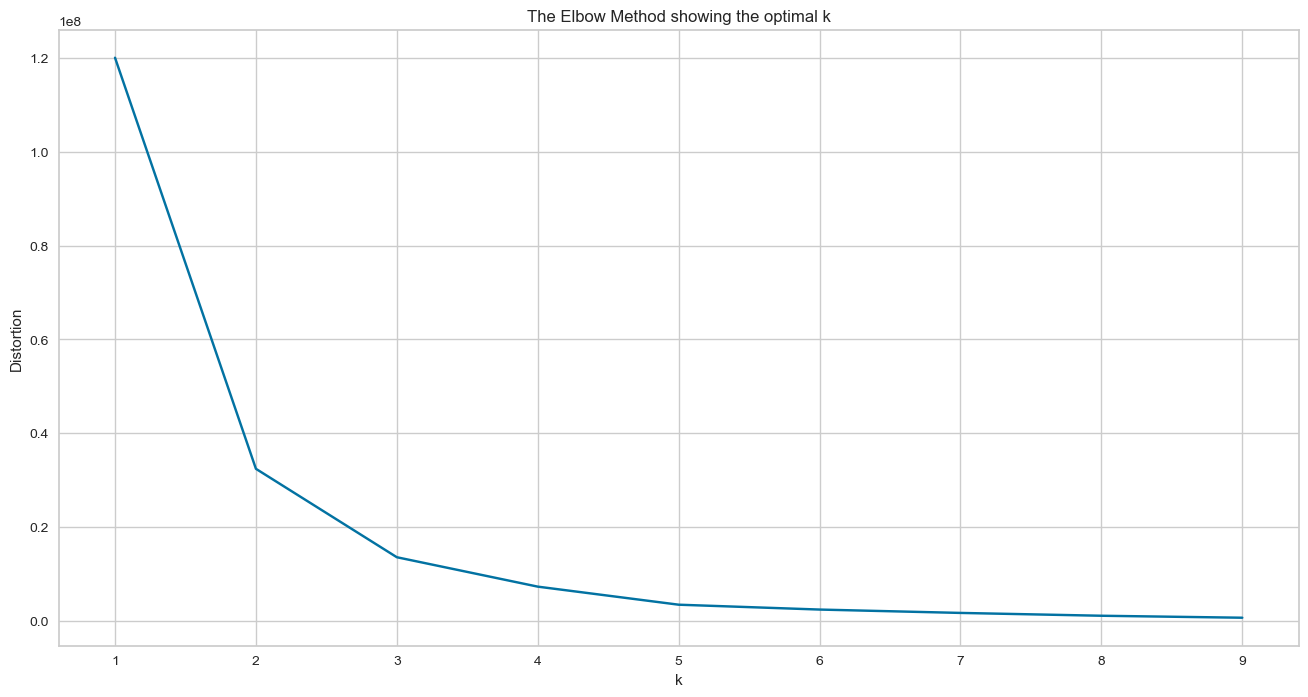

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


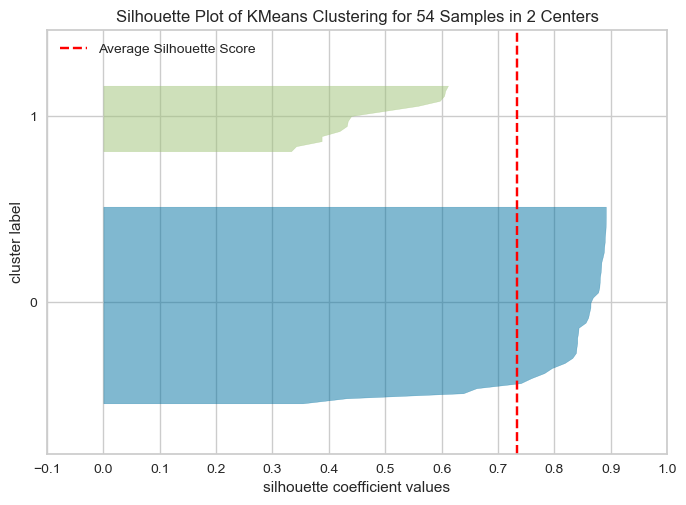

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 54 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [117]:
principalDf_square

### kmeans

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf_square)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 2개 혹은 3개 진행

kmeanModel_2 = KMeans(n_clusters=2)
kmeanModel_2.fit(principalDf_square)


from yellowbrick.cluster import SilhouetteVisualizer

visualizer_2 = SilhouetteVisualizer(kmeanModel_2, colors = 'yellowbrick')
visualizer_2.fit(principalDf_square)
visualizer_2.show()


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


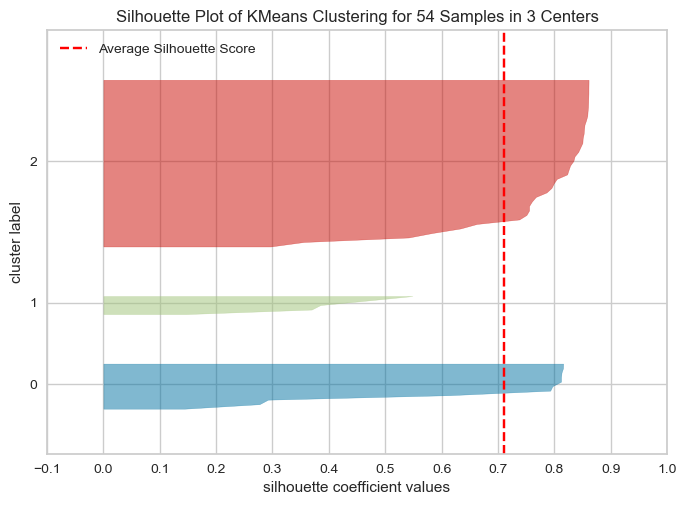

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 54 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [119]:
kmeanModel_3 = KMeans(n_clusters=3)
kmeanModel_3.fit(principalDf_square)

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_3 = SilhouetteVisualizer(kmeanModel_3, colors = 'yellowbrick')
visualizer_3.fit(principalDf_square)
visualizer_3.show()



C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


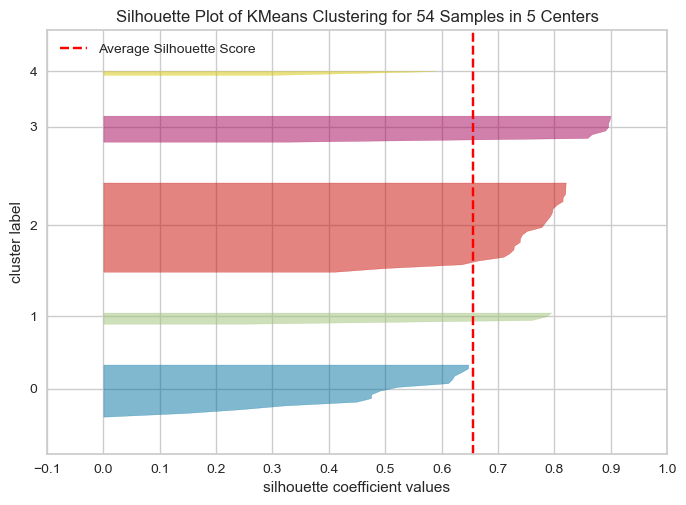

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 54 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
kmeanModel_5 = KMeans(n_clusters=5)
kmeanModel_5.fit(principalDf_square)

from yellowbrick.cluster import SilhouetteVisualizer

visualizer_5 = SilhouetteVisualizer(kmeanModel_5, colors = 'yellowbrick')
visualizer_5.fit(principalDf_square)
visualizer_5.show()

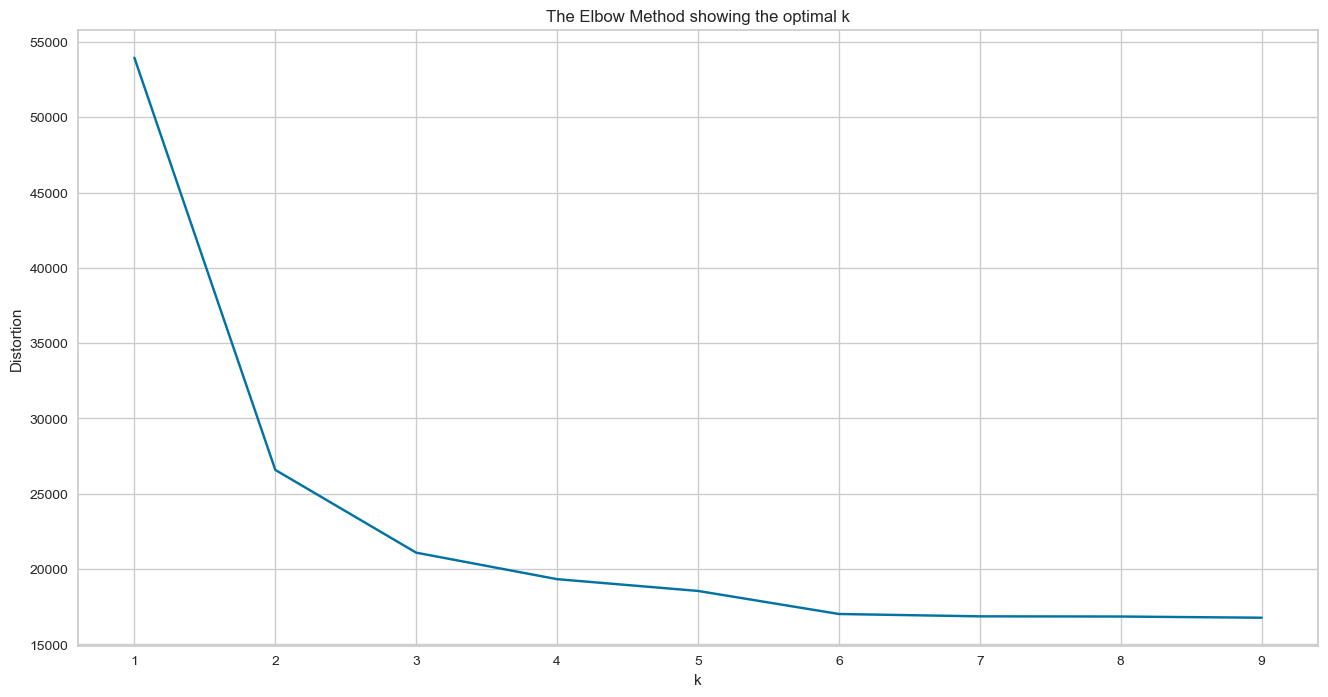

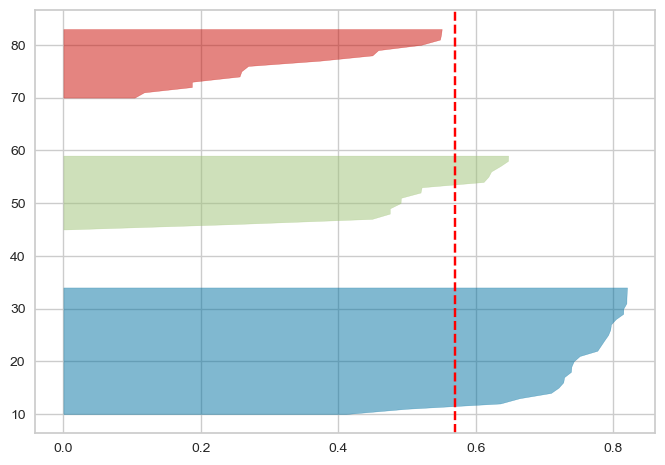

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 54 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
### k medoids
from sklearn_extra.cluster import KMedoids
distortions = []
K = range(1,10)
for k in K:
    KMedoidsModel = KMedoids(n_clusters=k)
    KMedoidsModel.fit(principalDf_square)
    distortions.append(KMedoidsModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


### 3개 혹은 8개 진행

KMedoidsModel_3 = KMedoids(n_clusters=3)
KMedoidsModel_3.fit(principalDf_square)


visualizer_3_kme = SilhouetteVisualizer(KMedoidsModel_3, colors = 'yellowbrick')
visualizer_3_kme.fit(principalDf_square)
visualizer_3.show()

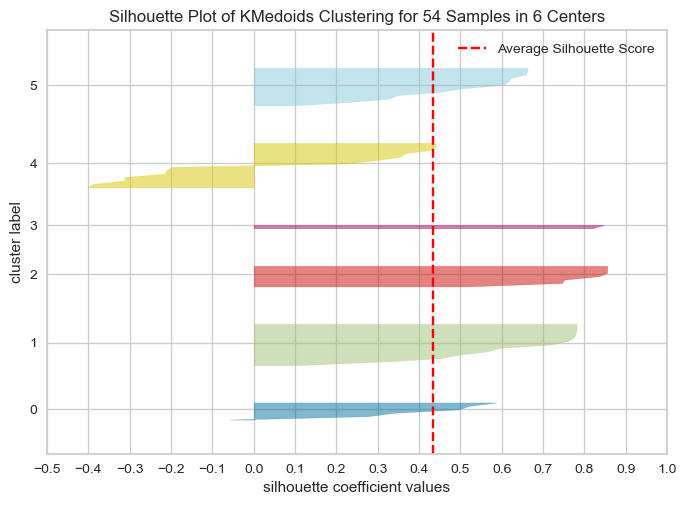

<AxesSubplot:title={'center':'Silhouette Plot of KMedoids Clustering for 54 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [125]:
KMedoidsModel_6 = KMedoids(n_clusters=6)
KMedoidsModel_6.fit(principalDf_square)

visualizer_6_kme = SilhouetteVisualizer(KMedoidsModel_6, colors = 'yellowbrick')
visualizer_6_kme.fit(principalDf_square)
visualizer_6_kme.show()


In [ ]:
principalDf_square['k_means_2']=kmeanModel_2.predict(principalDf_square)
principalDf_square['k_means_3']=kmeanModel_3.predict(principalDf_square)
principalDf_square['k_medoids_3']=KMedoidsModel_3.predict(principalDf_square)
 principalDf_square['k_medoids_6']=KMedoidsModel_6.predict(principalDf_square)

In [85]:
principalDf_square

,principal component1,principal component2,k_means_2,k_means_3,k_medoids_3,k_medoids_6
0,-1071.487933,3.631127,0,0,0,5
1,370.093997,-1.006665,0,2,1,3
2,1051.678657,1.430317,1,2,2,4
3,-847.071863,0.335060,0,0,0,1
4,-1275.239105,-0.227797,0,0,0,5
5,-1090.488808,1.210644,0,0,0,5
6,-792.405583,1.442776,0,0,0,1
7,-594.072306,0.242868,0,0,1,2
8,1195.659816,-0.115672,1,2,2,4
9,1191.744719,-0.404162,1,2,2,4


Text(0.5, 1.0, 'k_means_3')

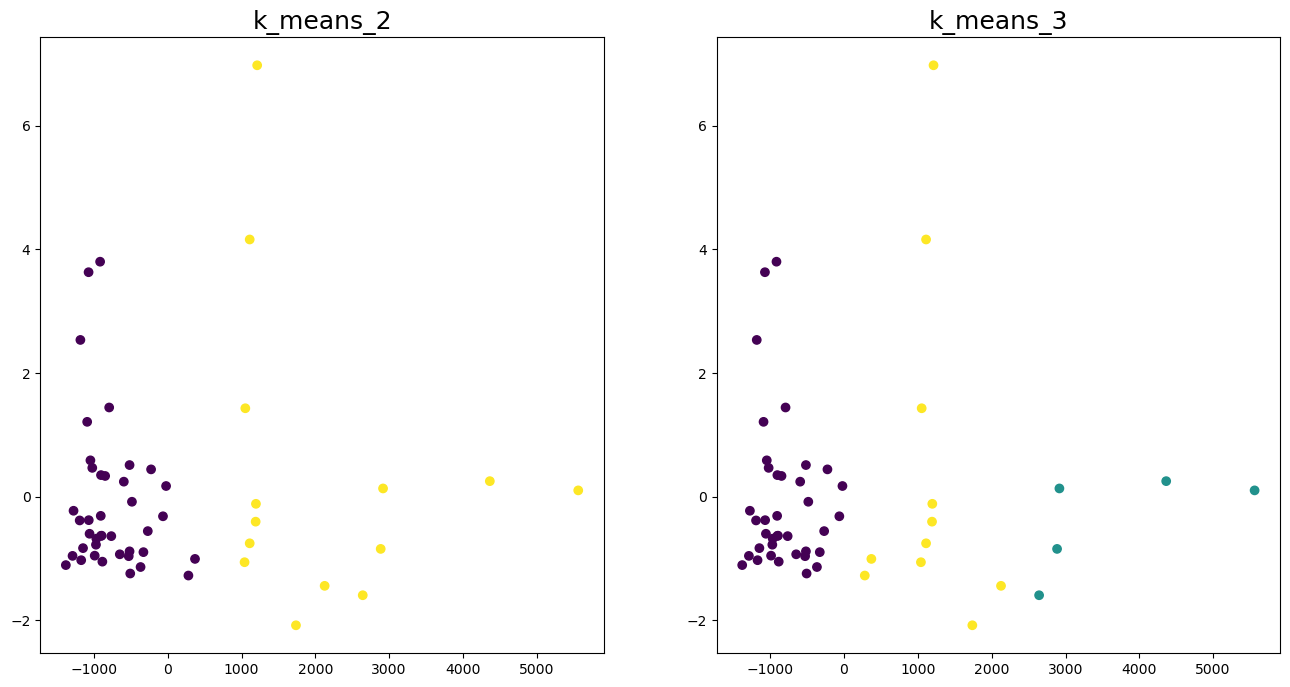

In [86]:
### 그래프 시각화
### kmeans 시각화
### k_means_2 vs k_means_3
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_means_2'])
axes[1].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_means_3'])
axes[0].set_title('k_means_2', fontsize=18)
axes[1].set_title('k_means_3', fontsize=18)

Text(0.5, 1.0, 'k_medoids_6')

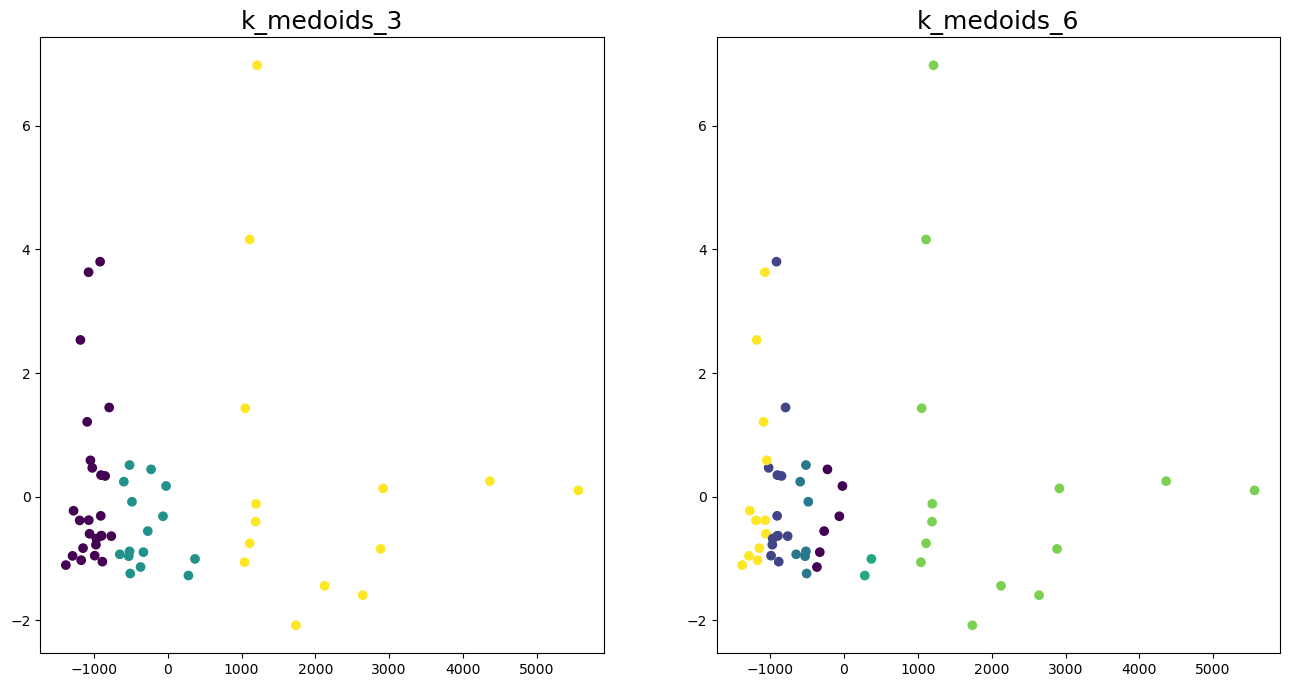

In [87]:
### 그래프 시각화
### kmedoids 시각화
### kmedoids_3 vs kmedoids_8
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_medoids_3'])
axes[1].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_medoids_6'])
axes[0].set_title('k_medoids_3', fontsize=18)
axes[1].set_title('k_medoids_6', fontsize=18)

In [88]:
df_clust = df_clust.drop(['Unnamed: 0'], axis=1)

In [89]:
### 클러스터별 시각화
df_clust_sd = df_clust.assign(k_means_2 = principalDf_square['k_means_2'],
                             k_means_3 = principalDf_square['k_means_3'],
                             k_medoids_3 = principalDf_square['k_medoids_3'],
                             k_medoids_6 = principalDf_square['k_medoids_6'])
df_clust_sd

,구별인덱스,시장명,유동인구,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),매장면적(㎡),종사자 수(명),주차 면수,...,용도지역_일반상업지역,용도지역_일반주거,용도지역_제2종일반주거,용도지역_제3종일반주거,용도지역_주거,용도지역_준주거,k_means_2,k_means_3,k_medoids_3,k_medoids_6
0,1,자갈치시장,435.166667,자갈치해안로 52,['수산물'],1970,272,3576.00,1500,161,...,0,0,0,0,0,0,0,0,0,5
1,2,부산데파트상가,1876.750000,부산시 중구 중앙대로21,"['건강식품', '잡화']",1973,90,5759.00,116,0,...,0,0,0,0,0,0,0,2,1,3
2,4,국제시장,2558.333333,중구로 42,"['의류', '가구', '문구']",1948,482,9497.00,871,29,...,0,0,0,0,0,0,1,2,2,4
3,5,창선상가,659.583333,국제시장2길 5,['전기'],1948,144,3892.00,442,0,...,0,0,0,0,0,0,0,0,0,1
4,6,보수종합시장,231.416667,보수대로 94,"['청과물', '문구']",1978,117,4725.00,138,10,...,0,0,0,0,0,0,0,0,0,5
5,7,신천지시장,416.166667,자갈치로 33,"['의류', '생활용품']",1980,147,11527.00,200,120,...,0,0,0,0,0,0,0,0,0,5
6,8,신동아수산물\n종합시장,714.250000,부산시 중구 \n자갈치로 42,['수산물'],1987,385,7652.28,258,130,...,1,0,0,0,0,0,0,0,0,1
7,9,남포지하도상가,912.583333,구덕로 지하 44,"['의류', '잡화']",1988,281,6132.00,400,0,...,0,0,0,0,0,0,0,0,1,2
8,11,월드밸리,2702.316000,대청로 60,['잡화'],1995,215,9584.00,145,108,...,0,0,0,0,0,0,1,2,2,4
9,12,남포동 건어물 도매시장,2698.400000,구덕로 19-1(남포동4가),['수산물'],1934,117,7626.00,370,8,...,0,0,0,0,0,0,1,2,2,4


In [90]:
df_clust_sd.to_csv('D:/Users/ChaeSoYeon/Desktop/부산공모전 준비/standard_clust.csv', encoding = 'cp949')

## RobustScaler
    ### PCA 진행
        1. component_2
        2. component_3

In [91]:
### RobustScaler

df_RobustScaler

### pca

from sklearn.decomposition import PCA
#3번 4번 성분은 0.04정도로 설명 가능한 분산량이 얼마 증가하지 않기 때문에,
#주성분은 2개로 결정하는 것이 적절하다.
#점점 작아지도록 정렬되어 있음을 알 수 있다.
pca_square = PCA(n_components=2)
printcipalComponents_square = pca_square.fit_transform(df_RobustScaler)
principalDf_square = pd.DataFrame(data=printcipalComponents_square, columns = ['principal component1', 'principal component2'])
print(pca_square.explained_variance_ratio_)


pca_cubic= PCA(n_components=3)
printcipalComponents_cubic = pca_cubic.fit_transform(df_RobustScaler)
principalDf_cubic = pd.DataFrame(data=printcipalComponents_cubic, columns = ['principal component1', 'principal component2', 'principal component3'])
print(pca_cubic.explained_variance_ratio_)

### backward


[9.99993900e-01 2.70000263e-06]
[9.99993900e-01 2.70000263e-06 1.21589960e-06]


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


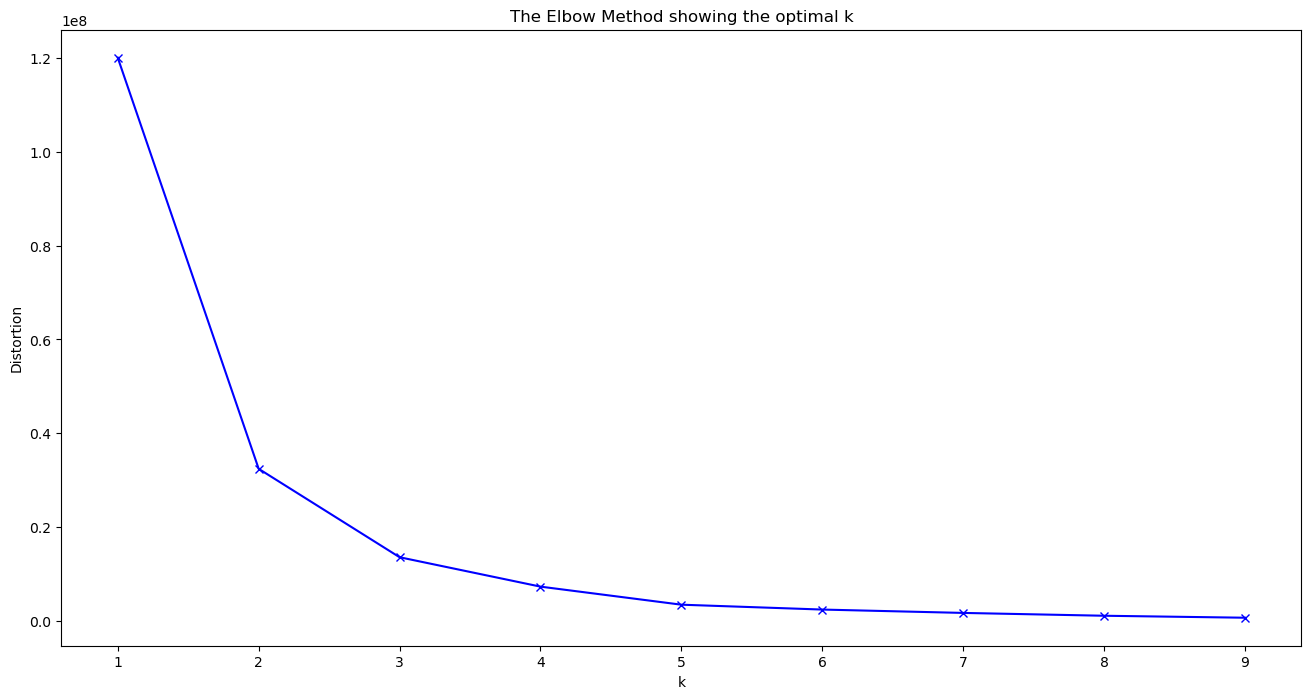

In [92]:
principalDf_square

### kmeans

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDf_square)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 2개 혹은 3개 진행

kmeanModel_2 = KMeans(n_clusters=2)
kmeanModel_2.fit(principalDf_square)
principalDf_square['k_means_2']=kmeanModel_2.predict(principalDf_square)


kmeanModel_3 = KMeans(n_clusters=3)
kmeanModel_3.fit(principalDf_square)
principalDf_square['k_means_3']=kmeanModel_3.predict(principalDf_square)





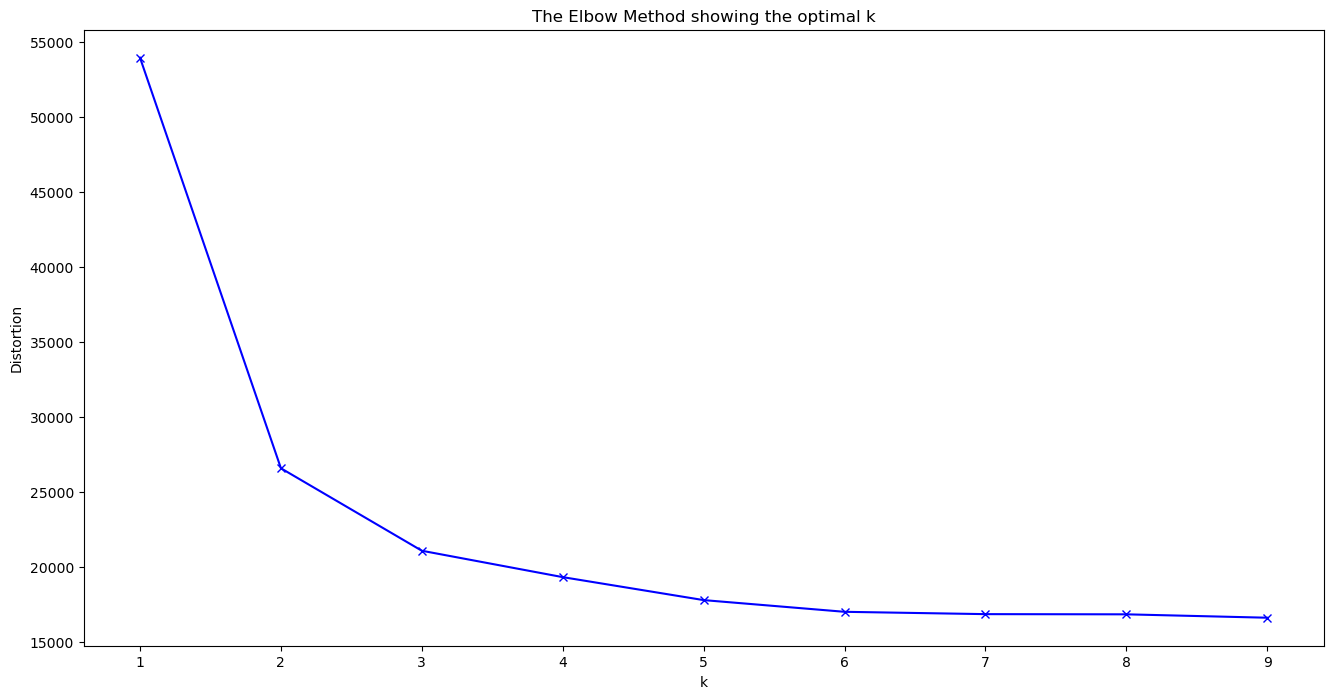

In [93]:
### k medoids
from sklearn_extra.cluster import KMedoids
distortions = []
K = range(1,10)
for k in K:
    KMedoidsModel = KMedoids(n_clusters=k)
    KMedoidsModel.fit(principalDf_square)
    distortions.append(KMedoidsModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


### 3개 혹은 8개 진행

KMedoidsModel_3 = KMedoids(n_clusters=3)
KMedoidsModel_3.fit(principalDf_square)
principalDf_square['k_medoids_3']=KMedoidsModel_3.predict(principalDf_square)


KMedoidsModel_8 = KMedoids(n_clusters=8)
KMedoidsModel_8.fit(principalDf_square)
principalDf_square['k_medoids_8']=KMedoidsModel_8.predict(principalDf_square)


In [94]:
principalDf_square

,principal component1,principal component2,k_means_2,k_means_3,k_medoids_3,k_medoids_8
0,-1071.487885,3.500679,0,2,0,7
1,370.093329,-1.581684,0,0,1,4
2,1051.679322,1.061691,1,0,2,6
3,-847.071849,-0.045551,0,2,0,2
4,-1275.239272,-0.119476,0,2,0,7
5,-1090.487953,2.271282,0,2,0,7
6,-792.405169,2.400782,0,2,0,2
7,-594.072403,0.178348,0,2,1,0
8,1195.659305,-0.085563,1,0,2,6
9,1191.744614,-1.280299,1,0,2,6


Text(0.5, 1.0, 'k_means_3')

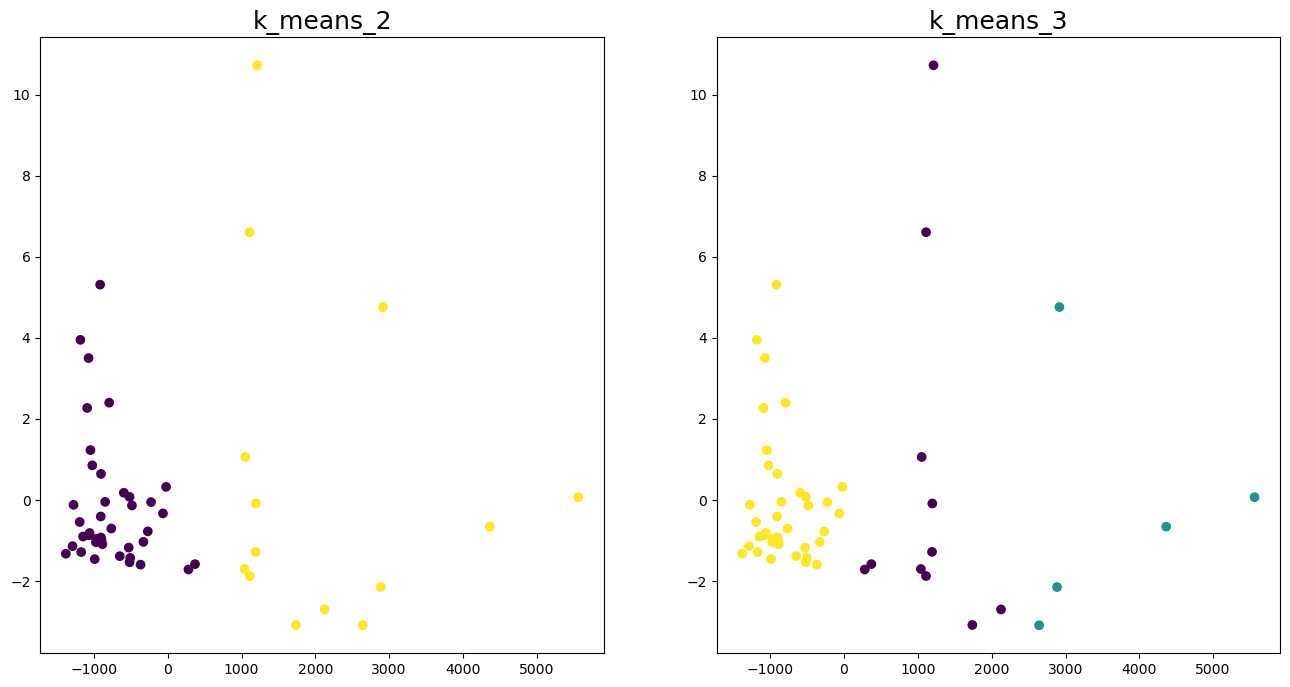

In [95]:
### 그래프 시각화

### k_means_2 vs k_means_3
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_means_2'])
axes[1].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_means_3'])
axes[0].set_title('k_means_2', fontsize=18)
axes[1].set_title('k_means_3', fontsize=18)

Text(0.5, 1.0, 'k_medoids_8')

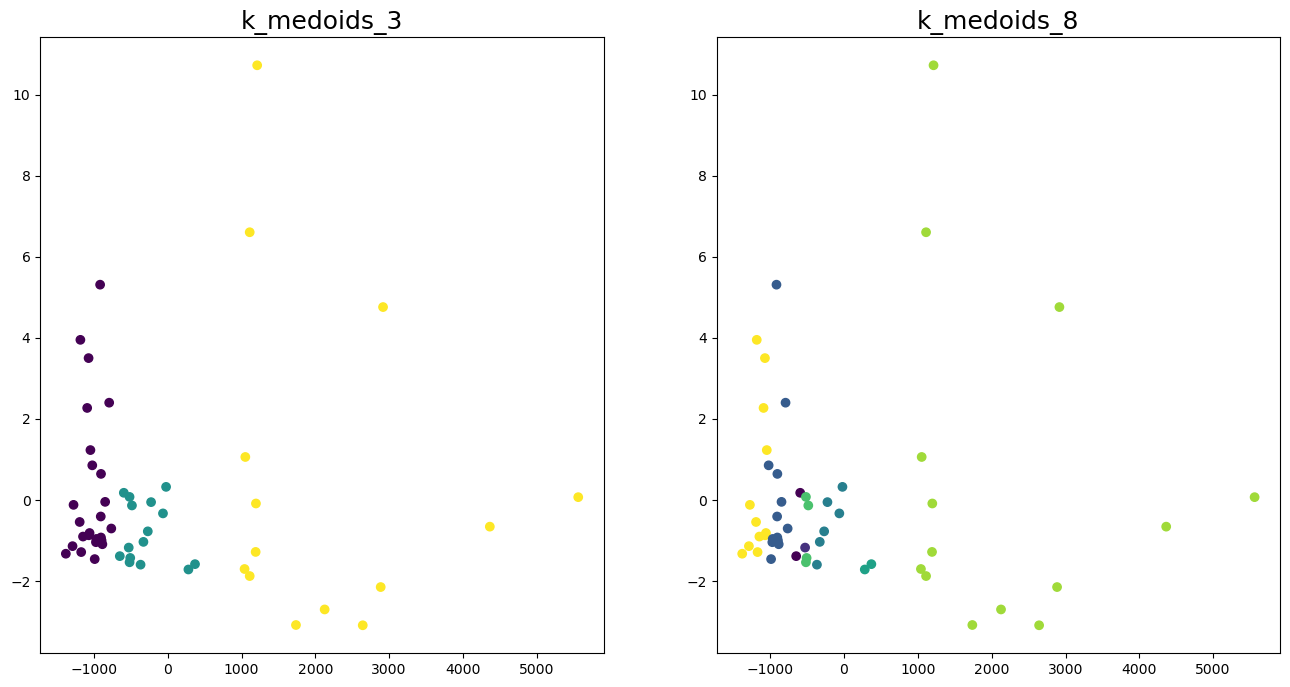

In [96]:
### 그래프 시각화
### kmedoids 시각화
### kmedoids_3 vs kmedoids_8
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_medoids_3'])
axes[1].scatter(principalDf_square["principal component1"], principalDf_square["principal component2"], c = principalDf_square['k_medoids_8'])
axes[0].set_title('k_medoids_3', fontsize=18)
axes[1].set_title('k_medoids_8', fontsize=18)

In [97]:
### 클러스터별 시각화
df_clust_rs = df_clust.assign(k_means_2 = principalDf_square['k_means_2'],
                             k_means_3 = principalDf_square['k_means_3'],
                             k_medoids_3 = principalDf_square['k_medoids_3'],
                             k_medoids_6 = principalDf_square['k_medoids_8'])
df_clust_rs

,구별인덱스,시장명,유동인구,소재지,주 판매상품,개설년도,운영중인 점포(계 - 빈점포),매장면적(㎡),종사자 수(명),주차 면수,...,용도지역_일반상업지역,용도지역_일반주거,용도지역_제2종일반주거,용도지역_제3종일반주거,용도지역_주거,용도지역_준주거,k_means_2,k_means_3,k_medoids_3,k_medoids_6
0,1,자갈치시장,435.166667,자갈치해안로 52,['수산물'],1970,272,3576.00,1500,161,...,0,0,0,0,0,0,0,2,0,7
1,2,부산데파트상가,1876.750000,부산시 중구 중앙대로21,"['건강식품', '잡화']",1973,90,5759.00,116,0,...,0,0,0,0,0,0,0,0,1,4
2,4,국제시장,2558.333333,중구로 42,"['의류', '가구', '문구']",1948,482,9497.00,871,29,...,0,0,0,0,0,0,1,0,2,6
3,5,창선상가,659.583333,국제시장2길 5,['전기'],1948,144,3892.00,442,0,...,0,0,0,0,0,0,0,2,0,2
4,6,보수종합시장,231.416667,보수대로 94,"['청과물', '문구']",1978,117,4725.00,138,10,...,0,0,0,0,0,0,0,2,0,7
5,7,신천지시장,416.166667,자갈치로 33,"['의류', '생활용품']",1980,147,11527.00,200,120,...,0,0,0,0,0,0,0,2,0,7
6,8,신동아수산물\n종합시장,714.250000,부산시 중구 \n자갈치로 42,['수산물'],1987,385,7652.28,258,130,...,1,0,0,0,0,0,0,2,0,2
7,9,남포지하도상가,912.583333,구덕로 지하 44,"['의류', '잡화']",1988,281,6132.00,400,0,...,0,0,0,0,0,0,0,2,1,0
8,11,월드밸리,2702.316000,대청로 60,['잡화'],1995,215,9584.00,145,108,...,0,0,0,0,0,0,1,0,2,6
9,12,남포동 건어물 도매시장,2698.400000,구덕로 19-1(남포동4가),['수산물'],1934,117,7626.00,370,8,...,0,0,0,0,0,0,1,0,2,6


In [98]:
df_clust_rs.to_csv('D:/Users/ChaeSoYeon/Desktop/부산공모전 준비/robust_clust.csv', encoding = 'cp949')